#Import data and unzip data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

#Adding API code here
#Ethereum
!kaggle datasets download -d yamqwe/cryptocurrency-extra-data-ethereum
#BTC
!kaggle datasets download -d yamqwe/cryptocurrency-extra-data-bitcoin

Mounted at /content/gdrive
 99% 1.18G/1.19G [00:09<00:00, 116MB/s]
100% 1.19G/1.19G [00:09<00:00, 134MB/s]
100% 1.21G/1.21G [00:09<00:00, 149MB/s]
100% 1.21G/1.21G [00:09<00:00, 136MB/s]


In [ ]:
#Unzip and delete zip file Ethereum
!unzip /content/cryptocurrency-extra-data-ethereum.zip && rm /content/cryptocurrency-extra-data-ethereum.zip

Archive:  /content/cryptocurrency-extra-data-ethereum.zip
  inflating: full_data__6__2017.csv  
  inflating: full_data__6__2017.jay  
  inflating: full_data__6__2018.csv  
  inflating: full_data__6__2018.jay  
  inflating: full_data__6__2019.csv  
  inflating: full_data__6__2019.jay  
  inflating: full_data__6__2020.csv  
  inflating: full_data__6__2020.jay  
  inflating: full_data__6__2021.csv  
  inflating: full_data__6__2021.jay  
  inflating: orig_asset_details.jay  
  inflating: orig_example_sample_submission.jay  
  inflating: orig_example_test.jay   
  inflating: orig_supplemental_train.jay  
  inflating: orig_train.jay          


In [ ]:
#Remove non use file Ethereum
!rm /content/full_data__6__2017.csv
!rm /content/full_data__6__2017.jay
!rm /content/full_data__6__2018.csv
!rm /content/full_data__6__2018.jay
!rm /content/full_data__6__2019.csv
!rm /content/full_data__6__2019.jay
!rm /content/full_data__6__2020.csv
!rm /content/full_data__6__2020.jay
!rm /content/orig_asset_details.jay
!rm /content/orig_example_test.jay
!rm /content/orig_example_sample_submission.jay
!rm /content/orig_supplemental_train.jay
!rm /content/orig_train.jay
!rm /content/full_data__6__2021.jay

In [ ]:
#Unzip and delete zip file BTC
!unzip /content/cryptocurrency-extra-data-bitcoin.zip && rm /content/cryptocurrency-extra-data-bitcoin.zip

Archive:  /content/cryptocurrency-extra-data-bitcoin.zip
  inflating: full_data__1__2017.csv  
  inflating: full_data__1__2017.jay  
  inflating: full_data__1__2018.csv  
  inflating: full_data__1__2018.jay  
  inflating: full_data__1__2019.csv  
  inflating: full_data__1__2019.jay  
  inflating: full_data__1__2020.csv  
  inflating: full_data__1__2020.jay  
  inflating: full_data__1__2021.csv  
  inflating: full_data__1__2021.jay  
  inflating: orig_asset_details.jay  
  inflating: orig_example_sample_submission.jay  
  inflating: orig_example_test.jay   
  inflating: orig_supplemental_train.jay  
  inflating: orig_train.jay          


In [ ]:
#Remove non use file BTC
!rm /content/full_data__1__2017.csv
!rm /content/full_data__1__2017.jay
!rm /content/full_data__1__2018.csv
!rm /content/full_data__1__2018.jay
!rm /content/full_data__1__2019.csv
!rm /content/full_data__1__2019.jay
!rm /content/full_data__1__2020.csv
!rm /content/full_data__1__2020.jay
!rm /content/orig_asset_details.jay
!rm /content/orig_example_test.jay
!rm /content/orig_example_sample_submission.jay
!rm /content/orig_supplemental_train.jay
!rm /content/orig_train.jay
!rm /content/full_data__1__2021.jay

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

#Data preparation

##News

In [ ]:
News_df = pd.read_csv("/content/gdrive/MyDrive/DATA/News.csv")

In [ ]:
News_df_rename = News_df.rename(columns={"date":"Date"})

In [ ]:
News_df_rename['Date'] = pd.to_datetime(News_df_rename['Date'])

In [ ]:
News_df_rename.head()

,Date,Armed conflicts and attacks,Arts and culture,Business and economy,Disasters and accidents,Health and environment,International relations,Law and crime,Politics and elections,Science and technology,Sports
0,2021-01-01,2,1,0,1,16,3,2,1,0,0
1,2021-01-02,5,1,0,2,13,0,5,1,0,0
2,2021-01-03,5,0,0,2,15,1,0,2,0,0
3,2021-01-04,1,0,0,0,14,2,6,0,0,0
4,2021-01-05,0,0,0,0,16,2,7,1,0,0


In [ ]:
News_df_rename.dtypes

Date                           datetime64[ns]
Armed conflicts and attacks             int64
Arts and culture                        int64
Business and economy                    int64
Disasters and accidents                 int64
Health and environment                  int64
International relations                 int64
Law and crime                           int64
Politics and elections                  int64
Science and technology                  int64
Sports                                  int64
dtype: object

##Ethereum Data

In [ ]:
Ethereum_df = pd.read_csv("/content/full_data__6__2021.csv")

In [ ]:
converted_df = pd.to_datetime(Ethereum_df['timestamp'], unit='s')
Ethereum_df["timestamp"] = pd.to_datetime(converted_df).dt.date

In [ ]:
Ethereum_mean = Ethereum_df.groupby("timestamp").mean()

In [ ]:
Ethereum_per_day = pd.DataFrame(Ethereum_mean)

In [ ]:
Ethereum_per_day.reset_index(level =['timestamp'], inplace = True)

In [ ]:
Ethereum_df_drop = Ethereum_per_day.drop(["Unnamed: 0", 'Asset_ID',"Asset_Name","Weight"], axis=1)

In [ ]:
Ethereum_df_drop.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2021-01-01,714.535789,736.325356,737.758499,735.013739,736.317582,1029.567738,736.308308,-0.000261
1,2021-01-02,1237.545833,749.941874,751.758965,748.330258,749.970172,2098.535562,749.949494,-0.000227
2,2021-01-03,2596.386806,858.970138,861.493636,856.351022,859.116346,4545.645150,859.022822,0.001770
3,2021-01-04,3979.716667,1011.360017,1015.615272,1006.125012,1011.407847,6669.525992,1011.287606,0.000625
4,2021-01-05,2979.095833,1055.638582,1059.083567,1051.817500,1055.697981,4303.556280,1055.574876,-0.000354


In [ ]:
Ethereum_df_rename = Ethereum_df_drop.rename(columns={"timestamp" : "Date","Count":"Count_ETH", "Open" : "Open_ETH", "High" : "High_ETH","Low" : "Low_ETH","Close" : "Close_ETH","Volume":"Volume_ETH","VWAP":"VWAP_ETH","Target":"Target_ETH"})

In [ ]:
Ethereum_df_rename['Date'] = pd.to_datetime(Ethereum_df_rename['Date'])

In [ ]:
Training_df_ETH = pd.merge(Ethereum_df_rename, News_df_rename, on="Date")

In [ ]:
Training_df_ETH.head(10)

,Date,Count_ETH,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,VWAP_ETH,Target_ETH,Armed conflicts and attacks,Arts and culture,Business and economy,Disasters and accidents,Health and environment,International relations,Law and crime,Politics and elections,Science and technology,Sports
0,2021-01-01,714.535789,736.325356,737.758499,735.013739,736.317582,1029.567738,736.308308,-0.000261,2,1,0,1,16,3,2,1,0,0
1,2021-01-02,1237.545833,749.941874,751.758965,748.330258,749.970172,2098.535562,749.949494,-0.000227,5,1,0,2,13,0,5,1,0,0
2,2021-01-03,2596.386806,858.970138,861.493636,856.351022,859.116346,4545.645150,859.022822,0.001770,5,0,0,2,15,1,0,2,0,0
3,2021-01-04,3979.716667,1011.360017,1015.615272,1006.125012,1011.407847,6669.525992,1011.287606,0.000625,1,0,0,0,14,2,6,0,0,0
4,2021-01-05,2979.095833,1055.638582,1059.083567,1051.817500,1055.697981,4303.556280,1055.574876,-0.000354,0,0,0,0,16,2,7,1,0,0
5,2021-01-06,2662.052083,1136.384388,1140.549443,1132.029912,1136.447683,4227.332358,1136.368932,-0.000721,7,0,0,0,22,1,4,6,2,0
6,2021-01-07,2477.972917,1218.666023,1222.434182,1214.540287,1218.679151,3308.917556,1218.570739,0.000112,3,0,3,0,21,2,0,10,2,0
7,2021-01-08,3060.601389,1199.967540,1203.715451,1195.528009,1199.950305,3701.045293,1199.898390,0.000017,0,0,0,0,29,0,7,4,3,0
8,2021-01-09,1927.522222,1223.513340,1226.675105,1220.060810,1223.556397,2199.822246,1223.477110,-0.000421,0,2,0,4,15,1,5,0,1,1
9,2021-01-10,2440.109028,1302.380335,1306.284380,1298.182309,1302.387236,3058.387638,1302.300341,0.000070,2,0,2,4,13,0,4,4,0,0


##Bitcoin Data

In [ ]:
Bitcion_df = pd.read_csv("/content/full_data__1__2021.csv")

In [ ]:
converted_df = pd.to_datetime(Bitcion_df['timestamp'], unit='s')
Bitcion_df["timestamp"] = pd.to_datetime(converted_df).dt.date

In [ ]:
Bitcion_mean = Bitcion_df.groupby("timestamp").mean()
Bitcion_per_day = pd.DataFrame(Bitcion_mean)

In [ ]:
Bitcion_per_day.reset_index(level =['timestamp'], inplace = True)

In [ ]:
Bitcion_df_drop = Bitcion_per_day.drop(["Unnamed: 0", 'Asset_ID',"Asset_Name","Weight"], axis=1)

In [ ]:
Bitcion_df_drop.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2021-01-01,1757.471855,29245.250365,29309.248992,29190.017960,29245.599735,88.796881,29245.207258,0.000012
1,2021-01-02,3111.000000,30719.596032,30801.691551,30640.413442,30721.564531,200.391607,30719.716630,0.000191
2,2021-01-03,3329.409722,33458.848724,33527.735792,33383.172473,33459.302036,177.909598,33458.417500,-0.000499
3,2021-01-04,4014.572222,31840.149871,31927.228928,31746.949010,31839.918204,227.899576,31839.014003,-0.000580
4,2021-01-05,3398.030556,32247.589449,32323.251798,32167.270789,32249.090878,173.422788,32247.237141,0.000161


In [ ]:
Bitcion_df_rename = Bitcion_df_drop.rename(columns={"timestamp" : "Date","Count":"Count_BTC", "Open" : "Open_BTC", "High" : "High_BTC","Low" : "Low_BTC","Close" : "Close_BTC","Volume":"Volume_BTC","VWAP":"VWAP_BTC","Target":"Target_BTC"})

In [ ]:
Bitcion_df_rename['Date'] = pd.to_datetime(Bitcion_df_rename['Date'])

In [ ]:
Training_df_BTC = pd.merge(Bitcion_df_rename, News_df_rename, on="Date")

In [ ]:
Training_df_BTC.head(10)

,Date,Count_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,VWAP_BTC,Target_BTC,Armed conflicts and attacks,Arts and culture,Business and economy,Disasters and accidents,Health and environment,International relations,Law and crime,Politics and elections,Science and technology,Sports
0,2021-01-01,1757.471855,29245.250365,29309.248992,29190.017960,29245.599735,88.796881,29245.207258,0.000012,2,1,0,1,16,3,2,1,0,0
1,2021-01-02,3111.000000,30719.596032,30801.691551,30640.413442,30721.564531,200.391607,30719.716630,0.000191,5,1,0,2,13,0,5,1,0,0
2,2021-01-03,3329.409722,33458.848724,33527.735792,33383.172473,33459.302036,177.909598,33458.417500,-0.000499,5,0,0,2,15,1,0,2,0,0
3,2021-01-04,4014.572222,31840.149871,31927.228928,31746.949010,31839.918204,227.899576,31839.014003,-0.000580,1,0,0,0,14,2,6,0,0,0
4,2021-01-05,3398.030556,32247.589449,32323.251798,32167.270789,32249.090878,173.422788,32247.237141,0.000161,0,0,0,0,16,2,7,1,0,0
5,2021-01-06,3631.358333,34848.071586,34954.164321,34732.879228,34849.798522,193.419240,34847.819095,-0.000211,7,0,0,0,22,1,4,6,2,0
6,2021-01-07,4032.945139,38030.128541,38135.467979,37913.878250,38031.905314,211.034397,38029.004662,0.000714,3,0,3,0,21,2,0,10,2,0
7,2021-01-08,4215.000000,39784.871022,39886.875130,39660.660730,39785.987988,214.987676,39783.560897,0.000339,0,0,0,0,29,0,7,4,3,0
8,2021-01-09,2793.000000,40356.776151,40444.194132,40259.152696,40356.514414,111.519017,40355.204464,-0.000820,0,2,0,4,15,1,5,0,1,1
9,2021-01-10,3792.640278,39700.715933,39805.886860,39589.913272,39700.034571,181.036364,39698.103578,-0.000359,2,0,2,4,13,0,4,4,0,0


##Bitcoin & Ethereum Data

In [ ]:
BE = pd.merge(Bitcion_df_rename,Ethereum_df_rename,on="Date")

In [ ]:
BE.head()

,Date,Count_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,VWAP_BTC,Target_BTC,Count_ETH,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,VWAP_ETH,Target_ETH
0,2021-01-01,1757.471855,29245.250365,29309.248992,29190.017960,29245.599735,88.796881,29245.207258,0.000012,714.535789,736.325356,737.758499,735.013739,736.317582,1029.567738,736.308308,-0.000261
1,2021-01-02,3111.000000,30719.596032,30801.691551,30640.413442,30721.564531,200.391607,30719.716630,0.000191,1237.545833,749.941874,751.758965,748.330258,749.970172,2098.535562,749.949494,-0.000227
2,2021-01-03,3329.409722,33458.848724,33527.735792,33383.172473,33459.302036,177.909598,33458.417500,-0.000499,2596.386806,858.970138,861.493636,856.351022,859.116346,4545.645150,859.022822,0.001770
3,2021-01-04,4014.572222,31840.149871,31927.228928,31746.949010,31839.918204,227.899576,31839.014003,-0.000580,3979.716667,1011.360017,1015.615272,1006.125012,1011.407847,6669.525992,1011.287606,0.000625
4,2021-01-05,3398.030556,32247.589449,32323.251798,32167.270789,32249.090878,173.422788,32247.237141,0.000161,2979.095833,1055.638582,1059.083567,1051.817500,1055.697981,4303.556280,1055.574876,-0.000354


In [ ]:
BE_join = pd.merge(BE,News_df_rename,on="Date")

In [ ]:
BE_join.head(10)

,Date,Count_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,VWAP_BTC,Target_BTC,Count_ETH,...,Armed conflicts and attacks,Arts and culture,Business and economy,Disasters and accidents,Health and environment,International relations,Law and crime,Politics and elections,Science and technology,Sports
0,2021-01-01,1757.471855,29245.250365,29309.248992,29190.017960,29245.599735,88.796881,29245.207258,0.000012,714.535789,...,2,1,0,1,16,3,2,1,0,0
1,2021-01-02,3111.000000,30719.596032,30801.691551,30640.413442,30721.564531,200.391607,30719.716630,0.000191,1237.545833,...,5,1,0,2,13,0,5,1,0,0
2,2021-01-03,3329.409722,33458.848724,33527.735792,33383.172473,33459.302036,177.909598,33458.417500,-0.000499,2596.386806,...,5,0,0,2,15,1,0,2,0,0
3,2021-01-04,4014.572222,31840.149871,31927.228928,31746.949010,31839.918204,227.899576,31839.014003,-0.000580,3979.716667,...,1,0,0,0,14,2,6,0,0,0
4,2021-01-05,3398.030556,32247.589449,32323.251798,32167.270789,32249.090878,173.422788,32247.237141,0.000161,2979.095833,...,0,0,0,0,16,2,7,1,0,0
5,2021-01-06,3631.358333,34848.071586,34954.164321,34732.879228,34849.798522,193.419240,34847.819095,-0.000211,2662.052083,...,7,0,0,0,22,1,4,6,2,0
6,2021-01-07,4032.945139,38030.128541,38135.467979,37913.878250,38031.905314,211.034397,38029.004662,0.000714,2477.972917,...,3,0,3,0,21,2,0,10,2,0
7,2021-01-08,4215.000000,39784.871022,39886.875130,39660.660730,39785.987988,214.987676,39783.560897,0.000339,3060.601389,...,0,0,0,0,29,0,7,4,3,0
8,2021-01-09,2793.000000,40356.776151,40444.194132,40259.152696,40356.514414,111.519017,40355.204464,-0.000820,1927.522222,...,0,2,0,4,15,1,5,0,1,1
9,2021-01-10,3792.640278,39700.715933,39805.886860,39589.913272,39700.034571,181.036364,39698.103578,-0.000359,2440.109028,...,2,0,2,4,13,0,4,4,0,0


In [ ]:
BE_join.isnull().sum()

Date                           0
Count_BTC                      0
Open_BTC                       0
High_BTC                       0
Low_BTC                        0
Close_BTC                      0
Volume_BTC                     0
VWAP_BTC                       0
Target_BTC                     0
Count_ETH                      0
Open_ETH                       0
High_ETH                       0
Low_ETH                        0
Close_ETH                      0
Volume_ETH                     0
VWAP_ETH                       0
Target_ETH                     0
Armed conflicts and attacks    0
Arts and culture               0
Business and economy           0
Disasters and accidents        0
Health and environment         0
International relations        0
Law and crime                  0
Politics and elections         0
Science and technology         0
Sports                         0
dtype: int64

#Modeling


##Ethereum&News Corr 

###XGBoots 

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_tree

####รอบที่1

ในการทำโมเดลเราจะใช้ฟีเจอร์จาก Corr ของ ETH รอบที่4

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_tree
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt 

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for BTC 
my_model_ETH_XGB = XGBRegressor(boosting_type='rf',n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_ETH_XGB.fit(X_train, y_train)

[07:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(boosting_type='rf', learning_rate=0.05, n_estimators=15000)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = my_model_ETH_XGB.predict(X_valid)
print("Mean Absolute Error_ETH_XGB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_XGB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_XGB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_XGB: 7.931647301910118
Mean Squared Error_ETH_XGB: 121.97192369178936
Root Mean Squared Error_ETH_XGB: 11.044089989301488


####รอบที่2

โดยการทำอีกรอบโดยไปทำการเลือกฟีเจอร์ใหม่ เพื่อให้มีความถูกต้องที่มากขึ้น

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment','Count_ETH','Armed conflicts and attacks','Law and crime']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for ETH 
my_model_ETH_XGB = XGBRegressor(boosting_type='rf',n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_ETH_XGB.fit(X_train, y_train)

[07:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(boosting_type='rf', learning_rate=0.05, n_estimators=15000)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = my_model_ETH_XGB.predict(X_valid)
print("Mean Absolute Error_ETH_XGB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_XGB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_XGB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_XGB: 7.769049028892391
Mean Squared Error_ETH_XGB: 119.80483159511803
Root Mean Squared Error_ETH_XGB: 10.945539346926584


In [ ]:
RMSE_XGB = mean_squared_error(predictions, y_valid, squared=False)

###Light Gradient Boosting

In [ ]:
from lightgbm import LGBMRegressor

####รอบที่1

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_ETH_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_ETH_LGBM.predict(X_valid)
print("Mean Absolute Error_ETH_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_LGBM: 56.71925179265032
Mean Squared Error_ETH_LGBM: 11468.376438516609
Root Mean Squared Error_ETH_LGBM: 107.090505828092


####รอบที่2

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment','Count_ETH','Armed conflicts and attacks','Law and crime']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_ETH_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_ETH_LGBM.predict(X_valid)
print("Mean Absolute Error_ETH_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_LGBM: 43.29106202742335
Mean Squared Error_ETH_LGBM: 5318.291406458771
Root Mean Squared Error_ETH_LGBM: 72.92661658447327


In [ ]:
RMSE_LGB = mean_squared_error(predictions, y_valid, squared=False)

####รอบที่3

กลับไปเลือกฟีเจอร์ใหม่เพื่อให้มีค่าความแม่นยำที่ส่งขึ้น

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment','Count_ETH','Armed conflicts and attacks','Law and crime','Arts and culture','Politics and elections']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_ETH_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_ETH_LGBM.predict(X_valid)
print("Mean Absolute Error_ETH_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_LGBM: 41.981329491440526
Mean Squared Error_ETH_LGBM: 5302.896871305557
Root Mean Squared Error_ETH_LGBM: 72.8209919687006


มีความแม่นยำไม่มากขึ้นทำก็ทำให้เราเลือก ใช้โมเดลนี้

###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

####รอบที่่1

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for BTC 
my_model_ETH_GB = GradientBoostingRegressor(n_estimators = 10000, learning_rate=0.05)

In [ ]:
my_model_ETH_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=10000)

In [ ]:
predictions = my_model_ETH_GB.predict(X_valid)
print("Mean Absolute Error_ETH_GB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_GB: 7.480365475425031
Mean Squared Error_ETH_GB: 116.0492468719081
Root Mean Squared Error_ETH_GB: 10.772615600303768


####รอบที่2

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment','Count_ETH','Armed conflicts and attacks','Law and crime']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for BTC 
my_model_ETH_GB = GradientBoostingRegressor(n_estimators = 10000, learning_rate=0.05)

In [ ]:
my_model_ETH_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=10000)

In [ ]:
predictions = my_model_ETH_GB.predict(X_valid)
print("Mean Absolute Error_ETH_GB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_GB: 7.550394884011131
Mean Squared Error_ETH_GB: 117.57138569518634
Root Mean Squared Error_ETH_GB: 10.84303397095049


In [ ]:
RMSE_GB = mean_squared_error(predictions, y_valid, squared=False)

###CatBoosting

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostRegressor

####รอบที่1

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_CatBoost = CatBoostRegressor(n_estimators = 10000, learning_rate=0.05)

In [ ]:
my_model_ETH_CatBoost.fit(X_train, y_train)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
5000:	learn: 0.1340384	total: 16.3s	remaining: 16.3s
5001:	learn: 0.1339025	total: 16.3s	remaining: 16.3s
5002:	learn: 0.1338867	total: 16.3s	remaining: 16.3s
5003:	learn: 0.1337453	total: 16.3s	remaining: 16.3s
5004:	learn: 0.1337052	total: 16.4s	remaining: 16.3s
5005:	learn: 0.1336364	total: 16.4s	remaining: 16.3s
5006:	learn: 0.1335400	total: 16.4s	remaining: 16.3s
5007:	learn: 0.1334386	total: 16.4s	remaining: 16.3s
5008:	learn: 0.1332975	total: 16.4s	remaining: 16.3s
5009:	learn: 0.1332463	total: 16.4s	remaining: 16.3s
5010:	learn: 0.1330975	total: 16.4s	remaining: 16.3s
5011:	learn: 0.1330333	total: 16.4s	remaining: 16.3s
5012:	learn: 0.1329127	total: 16.4s	remaining: 16.3s
5013:	learn: 0.1328806	total: 16.4s	remaining: 16.3s
5014:	learn: 0.1327820	total: 16.4s	remaining: 16.4s
5015:	learn: 0.1327274	total: 16.5s	remaining: 16.3s
5016:	learn: 0.1326306	total: 16.5s	remaining: 16.4s
5017:	learn: 0.1325472	total: 16.5s	remain

In [ ]:
predictions = my_model_ETH_CatBoost.predict(X_valid)
print("Mean Absolute Error_ETH_CatBoost: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_CatBoost: 16.789992722113414
Mean Squared Error_ETH_CatBoost: 544.4747734966994
Root Mean Squared Error_ETH_CatBoost: 23.333983232545176


In [ ]:
RMSE_CGB = mean_squared_error(predictions, y_valid, squared=False)

####รอบที่2 

In [ ]:
x = Training_df_ETH[['Open_ETH','High_ETH','Low_ETH','VWAP_ETH','Volume_ETH','Health and environment','Count_ETH','Armed conflicts and attacks','Law and crime']]
y = Training_df_ETH.Close_ETH

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
ETH_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = ETH_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_CatBoost = CatBoostRegressor(n_estimators = 5000, learning_rate=0.05)

In [ ]:
my_model_ETH_CatBoost.fit(X_train, y_train)

0:	learn: 952.3674495	total: 4.35ms	remaining: 21.7s
1:	learn: 911.7095209	total: 7.9ms	remaining: 19.7s
2:	learn: 874.8740017	total: 14.4ms	remaining: 24s
3:	learn: 838.3534604	total: 35ms	remaining: 43.7s
4:	learn: 801.8932331	total: 37.3ms	remaining: 37.3s
5:	learn: 766.3296059	total: 40.8ms	remaining: 34s
6:	learn: 734.5103242	total: 43.6ms	remaining: 31.1s
7:	learn: 706.8194534	total: 46.3ms	remaining: 28.9s
8:	learn: 680.5061928	total: 49.5ms	remaining: 27.4s
9:	learn: 651.8236026	total: 58.8ms	remaining: 29.3s
10:	learn: 627.7458849	total: 61.3ms	remaining: 27.8s
11:	learn: 601.0641747	total: 64.5ms	remaining: 26.8s
12:	learn: 578.7576593	total: 72ms	remaining: 27.6s
13:	learn: 555.6718180	total: 74.3ms	remaining: 26.5s
14:	learn: 535.4303034	total: 77.6ms	remaining: 25.8s
15:	learn: 515.1901599	total: 86.7ms	remaining: 27s
16:	learn: 493.2204701	total: 89.2ms	remaining: 26.1s
17:	learn: 474.1347447	total: 93.1ms	remaining: 25.8s
18:	learn: 455.9257610	total: 101ms	remaining: 26

In [ ]:
predictions = my_model_ETH_CatBoost.predict(X_valid)
print("Mean Absolute Error_ETH_CatBoost: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_CatBoost: 19.847457327907623
Mean Squared Error_ETH_CatBoost: 669.8001249998266
Root Mean Squared Error_ETH_CatBoost: 25.880497000634023


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
data_BTC_RMSE = {'Name': ['XGB', 'LGB', 'GB', 'CGB'],
        'RMSE': [RMSE_XGB, RMSE_LGB,RMSE_GB ,RMSE_CGB]}

In [ ]:
df_BTC_RMSE = pd.DataFrame(data_BTC_RMSE)

Text(0, 0.5, 'RMSE')

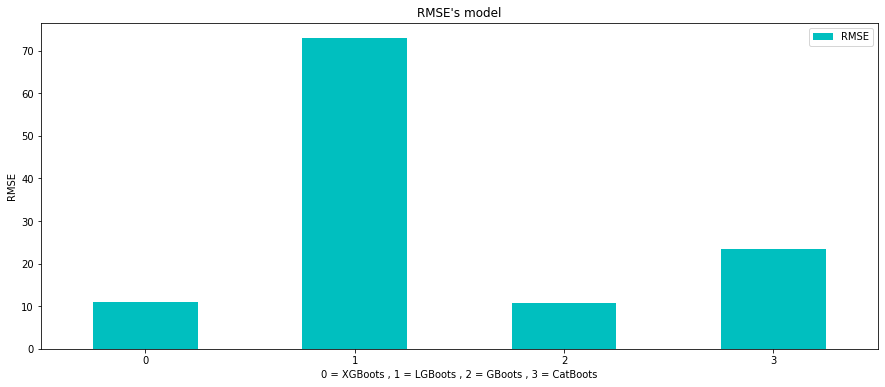

In [ ]:
df_BTC_RMSE.plot(kind="bar", figsize=(15,6), color="cmyk")
plt.title("RMSE's model")
plt.xticks(rotation=0)
plt.xlabel("0 = XGBoots , 1 = LGBoots , 2 = GBoots , 3 = CatBoots")
plt.ylabel("RMSE")

In [ ]:
df_BTC_RMSE

,Name,RMSE
0,XGB,10.945539
1,LGB,72.926617
2,GB,10.843034
3,CGB,23.333983


##Bitcoin&News Corr

###XGBoost

####รอบที่1

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for BTC 
my_model_BTC_XGB = XGBRegressor(boosting_type='rf',n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_XGB.fit(X_train, y_train)

[07:11:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(boosting_type='rf', learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_XGB.predict(X_valid)
print("Mean Absolute Error_BTC_XGB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_XGB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_XGB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_XGB: 74.87233208138244
Mean Squared Error_BTC_XGB: 10271.462288307835
Root Mean Squared Error_BTC_XGB: 101.34822291637795


In [ ]:
RMSE_XGB = mean_squared_error(predictions, y_valid, squared=False)

####รอบที่2

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
# model XGB for BTC 
my_model_BTC_XGB = XGBRegressor(boosting_type='rf',n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_XGB.fit(X_train, y_train)

[07:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(boosting_type='rf', learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_XGB.predict(X_valid)
print("Mean Absolute Error_BTC_XGB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_XGB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_XGB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_XGB: 82.30114343810992
Mean Squared Error_BTC_XGB: 11323.963193102905
Root Mean Squared Error_BTC_XGB: 106.41411181372001


###Light Gradient Boosting

####รอบที่1

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_BTC_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_LGBM.predict(X_valid)
print("Mean Absolute Error_BTC_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_LGBM: 416.7093596039145
Mean Squared Error_BTC_LGBM: 579397.0043995053
Root Mean Squared Error_BTC_LGBM: 761.1813216307303


####รอบที่2

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_BTC_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_LGBM.predict(X_valid)
print("Mean Absolute Error_BTC_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_LGBM: 427.292279361092
Mean Squared Error_BTC_LGBM: 522888.1868142992
Root Mean Squared Error_BTC_LGBM: 723.1100793200848


####รอบที่3

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections','Count_BTC','Armed conflicts and attacks','Sports']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_BTC_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_LGBM.predict(X_valid)
print("Mean Absolute Error_BTC_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_LGBM: 377.8975349107219
Mean Squared Error_BTC_LGBM: 380191.2011438047
Root Mean Squared Error_BTC_LGBM: 616.5964654000254


####รอบที่4

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections','Count_BTC','Armed conflicts and attacks','Sports','Disasters and accidents']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_BTC_LGBM = LGBMRegressor(n_estimators = 15000, learning_rate=0.05)

In [ ]:
my_model_BTC_LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=15000)

In [ ]:
predictions = my_model_BTC_LGBM.predict(X_valid)
print("Mean Absolute Error_BTC_LGBM: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_BTC_LGBM: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_BTC_LGBM: 396.9700837022303
Mean Squared Error_BTC_LGBM: 395707.1599911143
Root Mean Squared Error_BTC_LGBM: 629.052589209451


In [ ]:
RMSE_LGB = mean_squared_error(predictions, y_valid, squared=False)

###Gradient Boosting

####รอบที่1

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_GB = GradientBoostingRegressor(n_estimators = 10000, learning_rate=0.05)

In [ ]:
my_model_ETH_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=10000)

In [ ]:
predictions = my_model_ETH_GB.predict(X_valid)
print("Mean Absolute Error_ETH_GB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_GB: 53.50911527356066
Mean Squared Error_ETH_GB: 6278.766630708333
Root Mean Squared Error_ETH_GB: 79.2386687843021


In [ ]:
RMSE_GB = mean_squared_error(predictions, y_valid, squared=False)

####รอบที่2

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_GB = GradientBoostingRegressor(n_estimators = 10000, learning_rate=0.05)

In [ ]:
my_model_ETH_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=10000)

In [ ]:
predictions = my_model_ETH_GB.predict(X_valid)
print("Mean Absolute Error_ETH_GB: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_GB: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_GB: 48.733909863325685
Mean Squared Error_ETH_GB: 5066.996666751382
Root Mean Squared Error_ETH_GB: 71.18283969294413


###CatBoosting

####รอบที่1

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_CatBoost = CatBoostRegressor(n_estimators = 5000, learning_rate=0.05)

In [ ]:
my_model_ETH_CatBoost.fit(X_train, y_train)

In [ ]:
predictions = my_model_ETH_CatBoost.predict(X_valid)
print("Mean Absolute Error_ETH_CatBoost: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_CatBoost: 147.24539415829562
Mean Squared Error_ETH_CatBoost: 59605.69476052499
Root Mean Squared Error_ETH_CatBoost: 244.14277536008512


####รอบที่2

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_CatBoost = CatBoostRegressor(n_estimators = 5000, learning_rate=0.05)

In [ ]:
my_model_ETH_CatBoost.fit(X_train, y_train)

0:	learn: 9492.4967940	total: 2.78ms	remaining: 13.9s
1:	learn: 9105.7203638	total: 4.78ms	remaining: 12s
2:	learn: 8719.8525550	total: 6.96ms	remaining: 11.6s
3:	learn: 8344.3716788	total: 8.94ms	remaining: 11.2s
4:	learn: 7999.7934997	total: 10.9ms	remaining: 10.8s
5:	learn: 7680.0039540	total: 12.8ms	remaining: 10.6s
6:	learn: 7391.6699679	total: 14.7ms	remaining: 10.5s
7:	learn: 7083.5521008	total: 16.6ms	remaining: 10.4s
8:	learn: 6842.9731948	total: 18.5ms	remaining: 10.3s
9:	learn: 6560.6418230	total: 20.4ms	remaining: 10.2s
10:	learn: 6269.0668580	total: 22.3ms	remaining: 10.1s
11:	learn: 6001.5521916	total: 24.2ms	remaining: 10.1s
12:	learn: 5765.1650928	total: 26.1ms	remaining: 10s
13:	learn: 5512.3220673	total: 28ms	remaining: 9.97s
14:	learn: 5294.0988739	total: 30.3ms	remaining: 10.1s
15:	learn: 5084.3234302	total: 32.2ms	remaining: 10s
16:	learn: 4888.1517894	total: 34.2ms	remaining: 10s
17:	learn: 4698.3981663	total: 37ms	remaining: 10.2s
18:	learn: 4497.4700303	total: 3

In [ ]:
predictions = my_model_ETH_CatBoost.predict(X_valid)
print("Mean Absolute Error_ETH_CatBoost: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_CatBoost: 181.26608989218644
Mean Squared Error_ETH_CatBoost: 54926.467149738455
Root Mean Squared Error_ETH_CatBoost: 234.36396299290226


In [ ]:
RMSE_CGB = mean_squared_error(predictions, y_valid, squared=False)

####รอบที่3

In [ ]:
x = Training_df_BTC[['Open_BTC','High_BTC','Low_BTC','VWAP_BTC','Volume_BTC','Health and environment','Law and crime','Politics and elections','Count_BTC','Armed conflicts and attacks','Sports']]
y = Training_df_BTC.Close_BTC

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                                random_state=41)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
BTC_low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [ ]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
my_cols = BTC_low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

In [ ]:
my_model_ETH_CatBoost = CatBoostRegressor(n_estimators = 5000, learning_rate=0.05)

In [ ]:
my_model_ETH_CatBoost.fit(X_train, y_train)

0:	learn: 9530.5069157	total: 3.4ms	remaining: 17s
1:	learn: 9140.8036773	total: 7.31ms	remaining: 18.3s
2:	learn: 8787.1448949	total: 10.6ms	remaining: 17.6s
3:	learn: 8459.6801012	total: 13ms	remaining: 16.2s
4:	learn: 8102.8985230	total: 17.4ms	remaining: 17.4s
5:	learn: 7785.0526937	total: 19.3ms	remaining: 16.1s
6:	learn: 7469.3645508	total: 21.5ms	remaining: 15.3s
7:	learn: 7162.2935390	total: 23.8ms	remaining: 14.8s
8:	learn: 6872.2065068	total: 25.9ms	remaining: 14.4s
9:	learn: 6579.1814512	total: 28.1ms	remaining: 14s
10:	learn: 6290.5169812	total: 30.2ms	remaining: 13.7s
11:	learn: 6064.4253255	total: 32.2ms	remaining: 13.4s
12:	learn: 5810.7861880	total: 34.4ms	remaining: 13.2s
13:	learn: 5553.8785561	total: 36.7ms	remaining: 13.1s
14:	learn: 5330.6128403	total: 38.9ms	remaining: 12.9s
15:	learn: 5103.5954296	total: 41.1ms	remaining: 12.8s
16:	learn: 4911.9332272	total: 43.4ms	remaining: 12.7s
17:	learn: 4708.3611442	total: 45.6ms	remaining: 12.6s
18:	learn: 4511.6962804	tot

In [ ]:
predictions = my_model_ETH_CatBoost.predict(X_valid)
print("Mean Absolute Error_ETH_CatBoost: " + str(mean_absolute_error(predictions, y_valid)))
print("Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid)))
print("Root Mean Squared Error_ETH_CatBoost: "+ str(mean_squared_error(predictions, y_valid, squared=False)))

Mean Absolute Error_ETH_CatBoost: 230.27163354971051
Mean Squared Error_ETH_CatBoost: 93795.22930114843
Root Mean Squared Error_ETH_CatBoost: 306.260068081277


In [ ]:
data_BTC_RMSE = {'Name': ['XGB', 'LGB', 'GB', 'CGB'],
        'RMSE': [RMSE_XGB, RMSE_LGB,RMSE_GB ,RMSE_CGB]}

In [ ]:
df_BTC_RMSE = pd.DataFrame(data_BTC_RMSE)

Text(0, 0.5, 'RMSE')

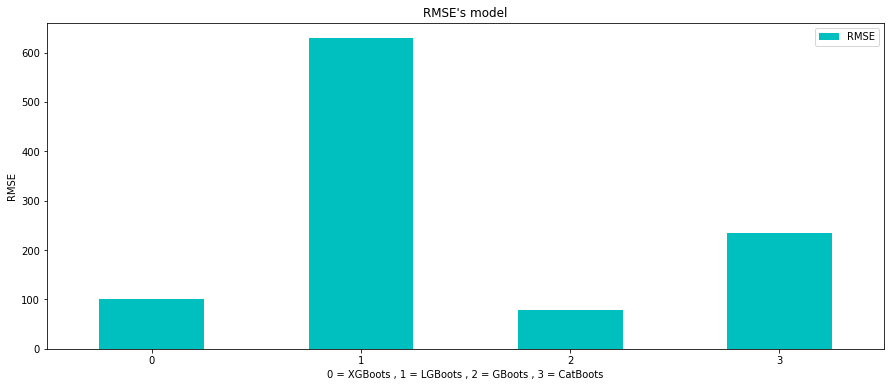

In [ ]:
df_BTC_RMSE.plot(kind="bar", figsize=(15,6), color="cmyk")
plt.title("RMSE's model")
plt.xticks(rotation=0)
plt.xlabel("0 = XGBoots , 1 = LGBoots , 2 = GBoots , 3 = CatBoots")
plt.ylabel("RMSE")

In [ ]:
df_BTC_RMSE

,Name,RMSE
0,XGB,101.348223
1,LGB,629.052589
2,GB,79.238669
3,CGB,234.363963
